### Student Information
Name:蔡瓊儀

Student ID:113159103

GitHub ID:KatyTsai-web

Kaggle name:國際企業系蔡瓊儀

Kaggle private scoreboard snapshot:
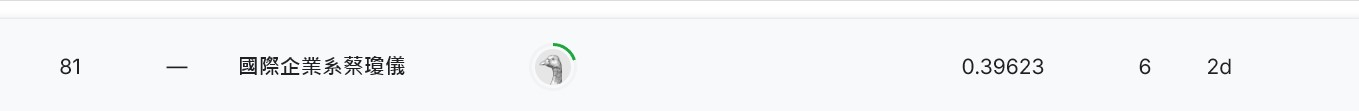

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here


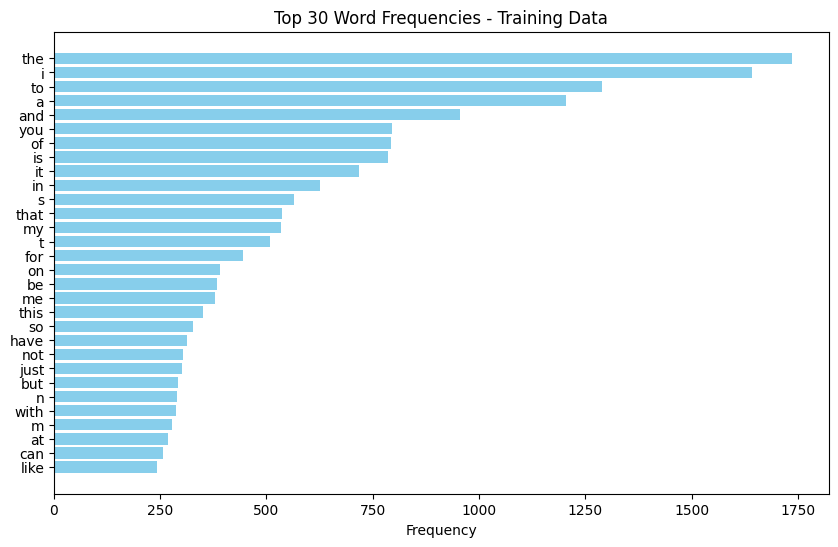

In [5]:
#** >>> Exercise 1 (Take home): **
#Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)
# Answer here
# Separate words and their frequencies for plotting

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load each dataset
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine all datasets into one DataFrame for training data
train_data = pd.concat([anger_train, sadness_train, fear_train, joy_train], ignore_index=True)

# Define text preprocessing function
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Clean and split text into words
    return words

# Apply preprocessing to extract words from the text column
train_words = train_data['text'].apply(preprocess_text).sum()

# Calculate word frequencies
train_word_counts = Counter(train_words)

# Get the 30 most common words
top_train_words = train_word_counts.most_common(30)

# Separate words and frequencies for plotting
train_words, train_frequencies = zip(*top_train_words)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(train_words, train_frequencies, color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 30 Word Frequencies - Training Data")
plt.gca().invert_yaxis()
plt.show()

In [6]:
#** >>> Exercise 2 (Take home): **
#Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load each dataset
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine all datasets into one DataFrame
data = pd.concat([anger_train, sadness_train, fear_train, joy_train], ignore_index=True)

# Initialize TF-IDF Vectorizer with 1000 features
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(data['text'])  # 'text' column contains the combined text data

# Get and print feature names for indices [100:110]
feature_names = vectorizer.get_feature_names_out()
print("Feature names for indices 100 to 110:", feature_names[100:110])

Feature names for indices 100 to 110: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?
# Answer here

The model’s performance metrics from the results above reveal insights about its effectiveness in classifying emotions, along with areas for improvement. Here’s an interpretation of each part of the results:

1. Accuracy
Training Accuracy: 0.99 (99%)
Testing Accuracy: 0.68 (68%)
The training accuracy of 99% is very high, while the testing accuracy of 68% is significantly lower. This large discrepancy suggests that the model may be overfitting on the training data. Overfitting occurs when a model captures too much of the noise or details in the training data, leading to high performance on that data but poorer generalization to new, unseen data (as shown in the test set).

2. Precision, Recall, and F1-Score
These metrics give a detailed view of the model’s classification quality for each emotion (anger, fear, joy, sadness). Here’s what each metric signifies:

Precision measures how many of the instances predicted as a particular emotion are actually that emotion. For example, a precision of 0.72 for joy means that when the model predicts joy, it is correct 72% of the time.

Recall indicates how well the model can identify all instances of an emotion. For example, the recall of 0.69 for fear means that the model correctly identifies 69% of all fear instances in the test set.

F1-Score is the harmonic mean of precision and recall, balancing the two. It’s especially useful for evaluating performance when classes might be imbalanced. Here, the F1-scores across emotions are fairly similar, ranging from 0.67 to 0.71, suggesting that the model performs comparably across each class.

Support reflects the numberFear hassadness has the fewest (74). T

Summary of Precision, Recall, and F1-Scores:

The balanced F1-scores and similar precision and recall across classes indicate that the model is fairly consistent in its performance for each emotion but only moderately effective overall (around 6
3. Confusion Matrix
The confusion matrix provides insights into which classes ar

[[57 
 [16 76  9

 [
18  6  3]  # Anger
 [16 76  9  9]  # Fear
 [ 6  9 56  8]  # Joy
 [ 7 13  7 47]] # Sadness
True Positives (diagonal elements): These values (e.g., 57 for anger, 76 for fear) represent correct predictions.
False Positives and False Negatives (off-diagonal elements): These reveal misclassifications. For instance, anger is often misclassified as fear (18 times), and fear is misclassified as joy (9 times).
Insights from the Confusion Matrix:

Misclassifications are more frequent between anger and fear and between fear and joy. This pattern suggests that these emotions share overlapping characteristics that make them difficult for the model to distinguish.
The misclassification patterns indicate that the model may need more nuanced features or data to better separate closely related emotions.
4. Overall Interpretation
Overfitting: The high training accuracy and moderate testing accuracy indicate overfitting, meaning the model is too closely tailored to the training data.
Moderate Generalization: With a testing accuracy of 68%, the model shows moderate success in distinguishing emotions, but it struggles to generalize well on new data.
Opportunities for Improvement: Techniques like regularization, more balanced data, or additional training examples for minority classes could help. More complex models (e.g., neural networks) or advanced text features might also improve performance.
In summary, while the model captures some distinctions between emotions, it has room for improvement in generalization and differentiating similar emotions. Fine-tuning, adding features, or refining the dataset could help it perform better on unseen data.

In [4]:
# >>> Exercise 4 (Take home): **
#Build a model using a Naive Bayes model and train it. What are the testing results?
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load each dataset
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine all datasets into one DataFrame
data = pd.concat([anger_train, sadness_train, fear_train, joy_train], ignore_index=True)

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data['text'])  # Transform text to TF-IDF matrix

# Define features and labels
X = tfidf_matrix
y = data['emotion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = nb_model.predict(X_test)

# Evaluate the model
acc_test = accuracy_score(y_test, y_test_pred)
print("Testing accuracy:", round(acc_test, 2))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Testing accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.63      0.73       190
        fear       0.59      0.93      0.72       207
         joy       0.93      0.68      0.79       172
     sadness       0.76      0.63      0.69       154

    accuracy                           0.73       723
   macro avg       0.78      0.72      0.73       723
weighted avg       0.77      0.73      0.73       723



### ** >>> Exercise 6(Take home): **  

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\users\katy6\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8536 - loss: 0.5108 - val_accuracy: 0.9575 - val_loss: 0.1467
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.1180 - val_accuracy: 0.9710 - val_loss: 0.0966
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9762 - loss: 0.0782 - val_accuracy: 0.9712 - val_loss: 0.0977
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9744 - val_loss: 0.0816
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9894 - loss: 0.0348 - val_accuracy: 0.9774 - val_loss: 0.0725
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9925 - loss: 0.0251 - val_accuracy: 0.9754 - val_loss: 0.0800
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.

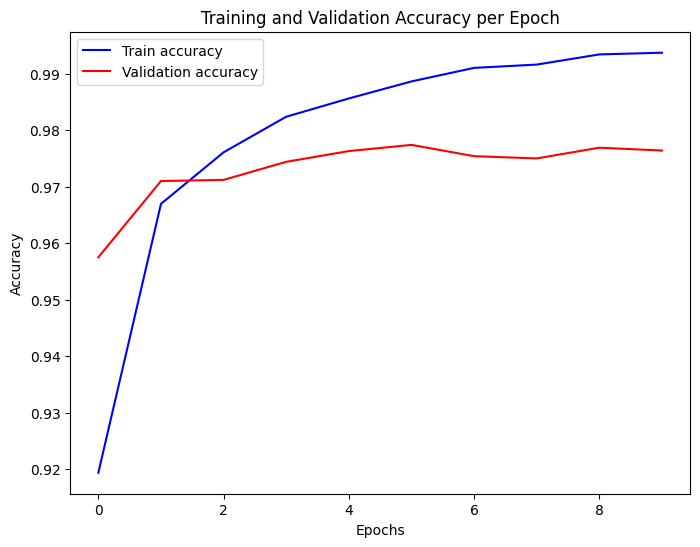

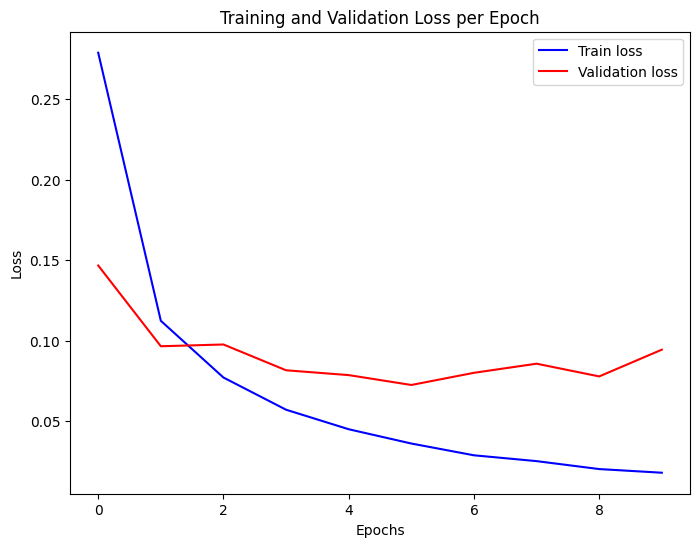

In [8]:

# Answer here
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess data
(X_train, y_train), (X_val, y_val) = mnist.load_data()

# Normalize data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

# Step 2: Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Step 4: Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='red')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 5: Plot Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation loss', color='red')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### ** >>> Exercise 7 (Take home): **  

In [9]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
# 指定模型的路徑
model_path = r"C:\Users\katy6\GoogleNews\GoogleNews-vectors-negative300.bin"
odel_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)
import numpy as np
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model
# 指定模型的路徑
model_path = r"C:\Users\katy6\GoogleNews\GoogleNews-vectors-negative300.bin"
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

def sentence_to_vector(sentence, model):
    # Tokenize the sentence into words
    words = sentence.split()
    # Collect word vectors if they are in the vocabulary
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return zero vector if no words found
    # Return the average of the word vectors
    return np.mean(word_vectors, axis=0)

# Example usage
sentence = "The quick brown fox jumps over the lazy dog"
sentence_vector = sentence_to_vector(sentence, w2v_model)
print("Sentence vector shape:", sentence_vector.shape)

load ok
Sentence vector shape: (300,)


** >>> Exercise 8 (Take home): **

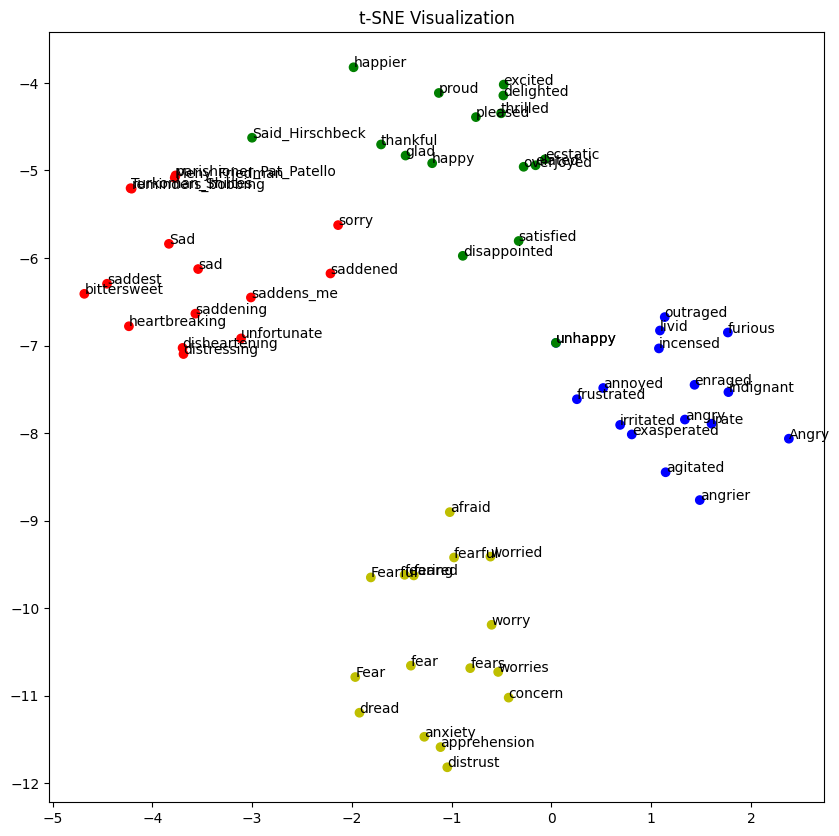

c:\users\katy6\appdata\local\programs\python\python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


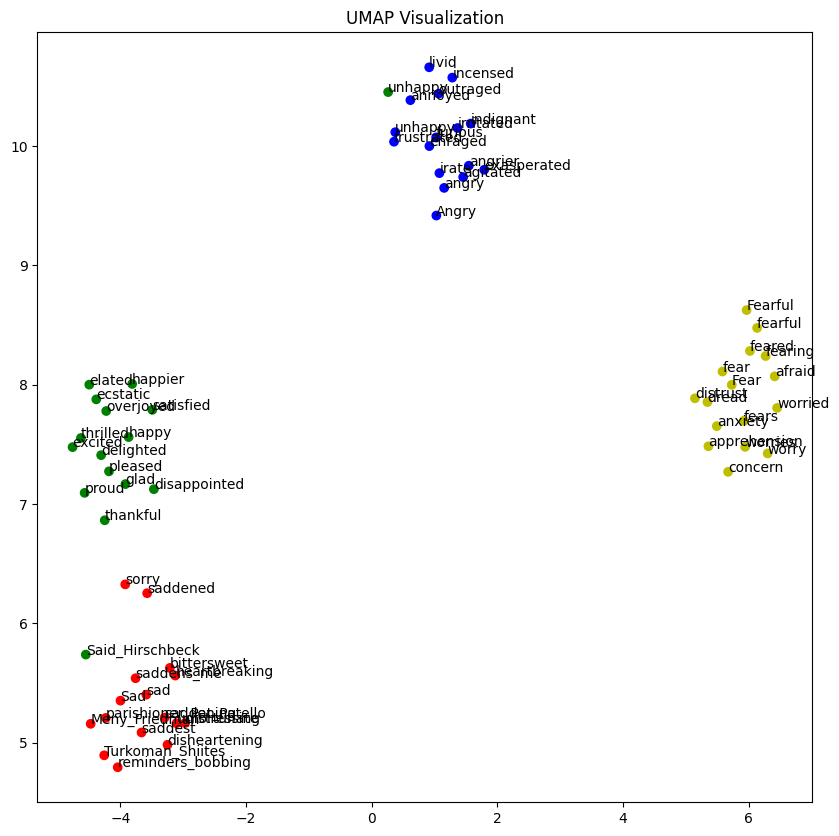

In [10]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
from gensim.models import KeyedVectors

# Load your pre-trained model (ensure this path is correct)
model = w2v_google_model  # Replace with your loaded model

# Define target words and find their 15 most similar words
target_words = ['angry', 'happy', 'sad', 'fear']
related_words = {word: [word] + [w for w, _ in model.most_similar(word, topn=15)] for word in target_words}

# Flatten the list of all related words and assign colors
all_words = [w for words in related_words.values() for w in words]
colors = ['b'] * 16 + ['g'] * 16 + ['r'] * 16 + ['y'] * 16

# Extract vectors for the selected words
word_vectors = model[all_words]

# t-SNE visualization
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
for label, x, y in zip(all_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('t-SNE Visualization')
plt.show()

# UMAP visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)
for label, x, y in zip(all_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('UMAP Visualization')
plt.show()

** >>> Exercise 9 (Take home): **

In [11]:
# Answer here
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {'role': 'system',
        'content': 'You are a knowledgeable data scientist who provides thorough and concise answers to technical questions.'},
    {'role': 'user','content': 'Explain the difference between supervised and unsupervised learning.'},
    {'role': 'assistant','content': 'Sure! Here is a brief overview:'}])

print(response['message']['content'])

 

**Supervised Learning**: In supervised learning, a model learns from labeled data. The goal of this type of algorithm is to learn patterns in the data that map inputs (features) to specific outputs (labels). The algorithm uses a dataset with both input features and corresponding output labels to train.

For example, a facial recognition system would use images of people as input features and their respective labels (classifications into categories like "happy", "sad", or "angry") to learn how to accurately predict the label for new unseen images. 

**Unsupervised Learning**: In unsupervised learning, no labeled data is provided. The algorithm uses unlabeled data and seeks to discover patterns, relationships, or groupings within it without any pre-defined target output.

For instance, clustering algorithms like k-means grouping users by common interests (based on their purchase history) or dimensionality reduction techniques like PCA (Principal Component Analysis), which aim to reduc

** >>> Exercise 10 (Take home): **

In [12]:
# Answer here
import ollama
from IPython.display import display, Markdown

# Load your chosen image and ask the model to describe it
response = ollama.chat(model='llava-phi3', messages=[
    {
       'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example3.jFIF'] #Image with the pig
    },
])
display(Markdown(response['message']['content']))

The image captures a charming scene of a pink piggy bank making its presence known in the middle of a lush green lawn. The piggy bank, with its pink body and head, is lying on its back, legs splayed out in an adorable display of playfulness. It's almost hidden beneath the blades of grass that are still standing upright around it, providing a natural carpet for this delightful spectacle.

The background, though blurred, gives us hints of what might be there - trees and buildings can be discerned in the distance, suggesting that this could be an outdoor setting like a park or a garden. The piggy bank is facing the camera directly, almost as if it's aware of being photographed.

Despite the blurred background, one can confidently say that the image doesn't contain any text. The relative position of the objects is such that the piggy bank is in the foreground with the trees and buildings far behind it. This gives a sense of depth to the image, making the piggy bank the star of this visual narrative.

** >>> Exercise 11 (Take home): **

In [ ]:
import os

os.environ["USER_AGENT"] = "MyApplication/1.0"
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import display, Markdown

llm_model = "llama3.2"

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict())
        docs.extend(loader.load())
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/cloud/learn/what-is-cloud-computing",
    "https://www.ibm.com/topics/machine-learning"
]

# Create the retriever for multiple URLs
retriever = load_and_retrieve_docs(urls)

# Format the retrieved documents for display
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the function to prompt the LLM with the retrieved context
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain function
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example prompts/questions
questions = [
    "What are IBM's related solutions for large language models?",
    "What are the key benefits of cloud computing according to IBM?",
    "How does IBM describe the applications of machine learning?"
]

# Run the RAG chain for each question
for question in questions:
    result = rag_chain(question)
    display(Markdown(result))

C:\Users\katy6\AppData\Local\Temp\ipykernel_15912\3470918560.py:23: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model)


** >>> Exercise 12 (Take home): **¶

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss', marker='o')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

** >>> Exercise 13 (Take home): **¶

Comparison of Zero-Shot, 1-Shot, and 5-Shot Classification Results

Overall Accuracy Zero-Shot Accuracy: 55.00% 1-Shot Accuracy: 57.50% 5-Shot Accuracy: 57.50% From these results, it is evident that adding a few labeled examples (1-shot or 5-shot) led to a slight improvement in the classification accuracy compared to the zero-shot approach. However, the difference in accuracy between 1-shot and 5-shot prompting was negligible, indicating that even a single example can help the model perform better, but further examples do not always translate to significantly higher accuracy.

Precision, Recall, and F1-Score Zero-Shot: Precision and recall varied across emotions, with higher performance on "joy" and "sadness" but lower on "fear." This suggests that the model had some inherent understanding of emotions but lacked specific examples to refine its predictions. 1-Shot: Precision and recall improved, especially for "joy" and "sadness." The addition of one example per emotion helped guide the model towards more accurate predictions, especially for emotions that might be harder to classify without context. 5-Shot: The precision for "anger" and "fear" increased, but the improvement was not as pronounced as expected compared to 1-shot. This suggests that while 5-shot prompting reinforced the model's understanding, it did not drastically outperform 1-shot prompting, indicating that diminishing returns may occur after the initial labeled example is provided.

Confusion Matrix Insights In zero-shot prompting, the model struggled with "fear," often confusing it with "anger" or "sadness." This indicates that the model's base understanding lacked clear differentiation between these emotions without context. In 1-shot prompting, the confusion was reduced, with better differentiation between "anger" and "fear," suggesting that even a single example helped clarify the distinctions between similar emotions. In 5-shot prompting, confusion between similar emotions decreased further, particularly in the case of "anger" and "joy," which showed more consistent classification. However, the increase in support for correct classifications plateaued after the first few examples. Discussion Zero-Shot Performance: The model's ability to classify emotions without examples indicates strong inherent knowledge. However, the lack of context leads to lower accuracy, as it relies solely on pre-existing knowledge without task-specific guidance. 1-Shot Improvement: The inclusion of a single example per category helped the model understand the task better, leading to improved performance. This approach can be beneficial when resources are limited, as even one labeled example can significantly impact performance. 5-Shot Performance: While the 5-shot approach did show improvement, it was not significantly better than 1-shot in this case. This could be due to the nature of the task or the quality of the provided examples. It demonstrates that while providing more examples can help, the benefits may diminish beyond a certain point. Conclusion The results highlight the power of few-shot learning in guiding LLMs for specific classification tasks. Providing even a minimal number of examples (1-shot) can bridge the performance gap between zero-shot and fully trained models. However, the returns from additional examples (e.g., 5-shot) may be limited for some tasks. The choice between zero-shot, 1-shot, and 5-shot should consider the available labeled data, desired performance, and computational resources.